#Intro to Neural Networks
#Carlos Gross-Martinez
#Z23226341
#Homework 2
#Answer Question 7 

In [4]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#import dataset from FAU site
df = pd.read_csv("http://www.cse.fau.edu/~xqzhu/courses/housing.header.binary.txt")

#printing the head and shape of data set
print(df.shape)
df.head()

(506, 14)


,Crim,Zn,Indus,Chas,Nox,Rm,Age,Dis,Rad,Tax,Ptratio,B,Lstat,Medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,1


In [5]:
#select the desired labels and features from the data set
#creating features and labels for Crim and Rm classes
features,labels = df.iloc[:,[0,5]], df.loc[:,['Medv']]
print(features.head())
labels.head()

      Crim     Rm
0  0.00632  6.575
1  0.02731  6.421
2  0.02729  7.185
3  0.03237  6.998
4  0.06905  7.147


,Medv
0,1
1,0
2,1
3,1
4,1


In [6]:
#importing library
from sklearn.model_selection import train_test_split

#splitting data set into training and test data sets to train and test model
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=.4, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(303, 2)
(303, 1)
(203, 2)
(203, 1)


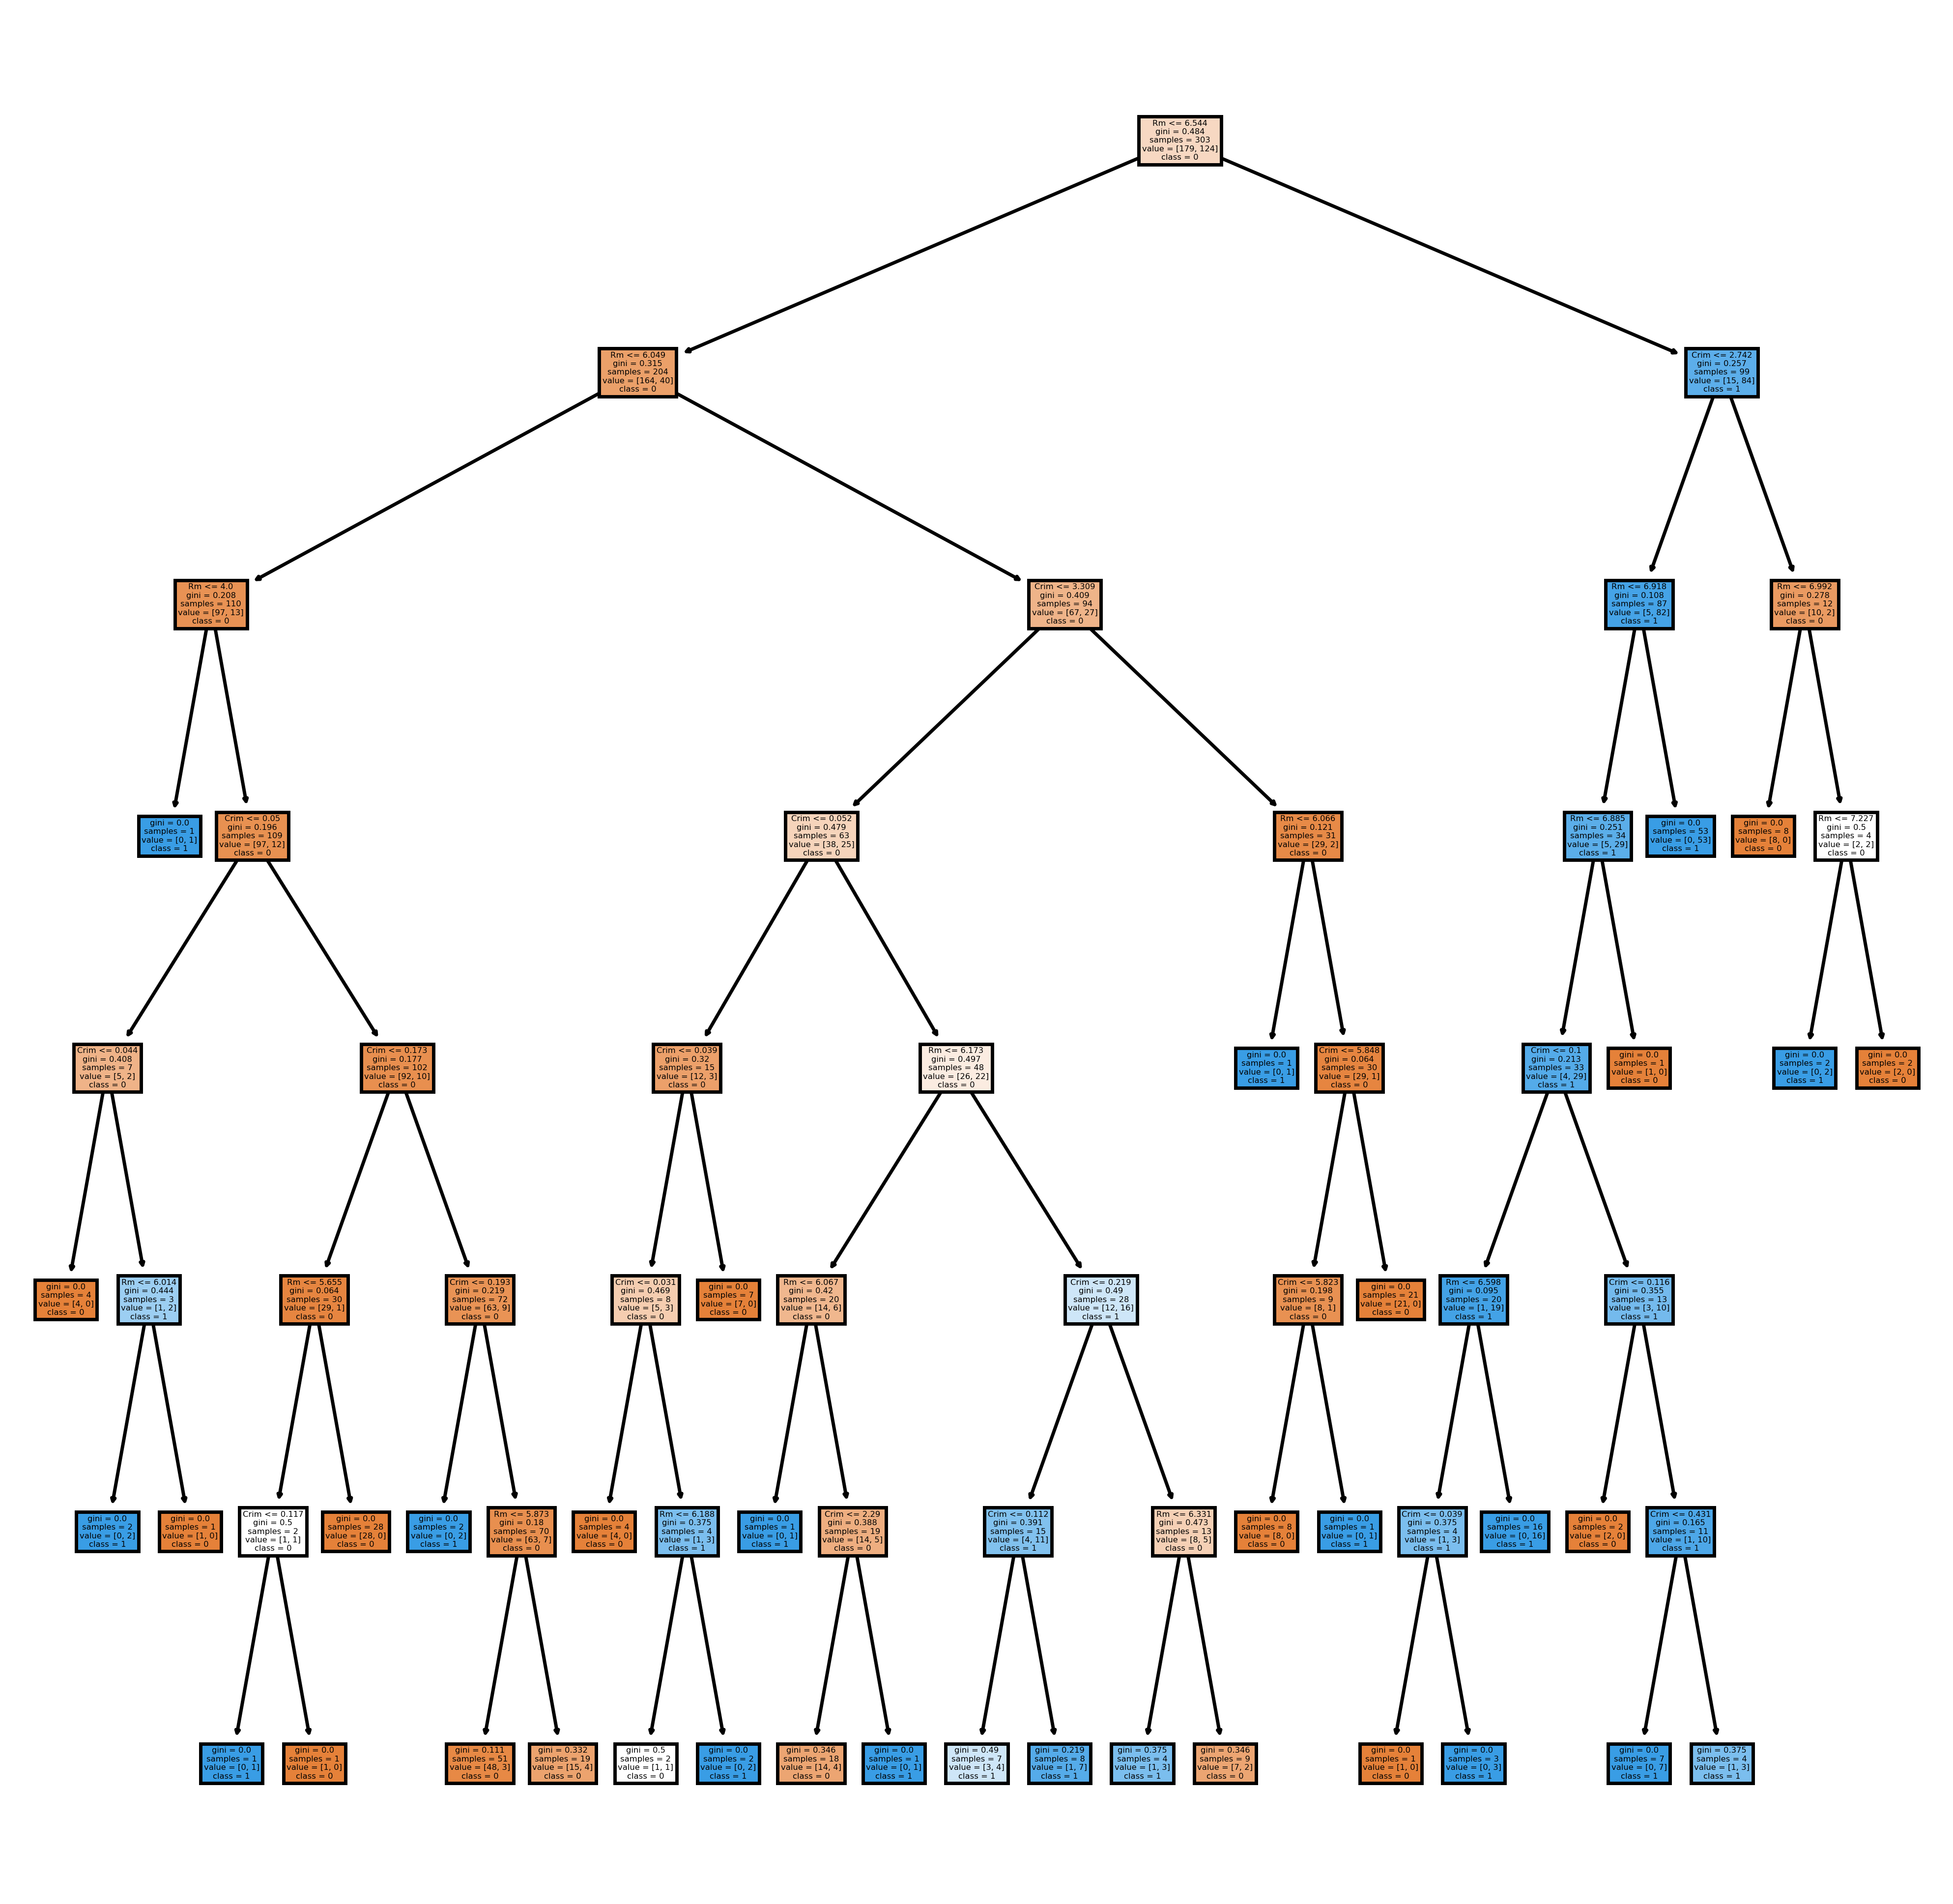

In [11]:
#importing library
from sklearn import tree

#declaring the classifiers
clf = tree.DecisionTreeClassifier(max_depth = 7)

#fitting the classifier
clf.fit(x_train, y_train)

#printing tree no parameters passed
#tree.plot_tree(clf)

#plotting tree paasing the plotmax parameters
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=500)
tree.plot_tree(clf,
               feature_names = features.columns, 
               class_names=['0','1'],
               filled = True);
#fig.savefig('tree2.png')

The measurement displayed in the root node have a specific menaing for each characteristic. On the very top the root node posses the following inequality: Rm <= 6.544. This information denoteds that the attribute at the root node is Rm and is Rm as a value of less or equal to 6.544, then the tree will traverse to the left, and to the other side if it is greater than the threshold. The second metric in the root node is the gini index of the atribute. This information reflects that the Rm attribute contained the lowest gini value form all attributes. The following metric descrives the to total number of samples in the set. The measurement below the sample's information, contain the split of samples based on the 6.544 condition. In this line it is possible to see that 179 samples will meet the condition of  Rm <= 6.544, while the remaining 124 will fall on the condition that Rm > 6.544. Finaly, the rrot node displays the class of the attribute in the root node
#Asnwer to question 8

In [12]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#import dataset from FAU site
df = pd.read_csv("http://www.cse.fau.edu/~xqzhu/courses/housing.header.binary.txt")

#printing the head and shape of data set
print(df.shape)
df.head()

(506, 14)


,Crim,Zn,Indus,Chas,Nox,Rm,Age,Dis,Rad,Tax,Ptratio,B,Lstat,Medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,1


In [13]:
#importing library
from sklearn.model_selection import train_test_split

#splitting data set into 80% of data set for training and 20% of data sets for testing
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 2)
(404, 1)
(102, 2)
(102, 1)


In [14]:
#importing library
from sklearn import tree

#declaring the classifier
clf = tree.DecisionTreeClassifier(max_depth = 7)

#fitting the classifier
clf.fit(x_train, y_train)

#testing classifier with the test data set
y_pred = clf.predict(x_test)

#printing classifier prediction results and true results 
print(y_pred, y_test)

[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]      Medv
173     1
274     1
491     0
72      0
452     0
..    ...
412     0
436     0
411     0
86      0
75      0

[102 rows x 1 columns]


In [15]:
#importing library
from sklearn.metrics import confusion_matrix

#Computing and printing confusion matrix
confusion_matrix(y_test, y_pred)

array([[61,  6],
       [14, 21]])

In [18]:
#placing each quadrant of confusion matrix into variable to calculate metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#printing variables to ensure they match quadrant in confusion matrix 
#print(tn, fp, fn, tp)

#calculating and printing TPR
tpr = float(tp) / float(tp + fn)
print("TPR = %f" % tpr)

#calculating and printing FPR
fpr = float(fp) / float(fp + tn)
print("FPR = %f" % fpr)

#calculating and printing accuracy
acc = float(tn + tp) / float(tn + fp + fn + tp)
print("Accuracy = %f" % acc)

TPR = 0.600000
FPR = 0.089552
Accuracy = 0.803922


AUC value is 0.804691


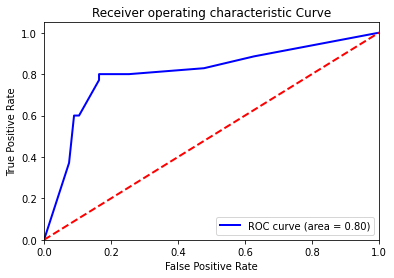

In [24]:
#import libraries
from sklearn import metrics
from sklearn.metrics import roc_auc_score

#compute probability values of the predicition
prob = clf.predict_proba(x_test)

#calculate AUC metric and print value
aucValue = roc_auc_score(y_test, prob[:,1])
print("AUC value is %f" % aucValue)

#computing the ROC curve axis values.
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob[:,1], pos_label=1)

#plottinh the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='blue',lw=lw, label='ROC curve (area = %0.2f)' % aucValue)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [29]:
#declaring set attribute values for classification
x_test_new_instance = np.flexible([0.03, 13, 3.5, 0.3, 0.58, 4.1, 68, 4.98, 3, 225, 17, 396, 7.56])
#x_test_new_instance

#using trained model to preditc new sample
y_pred_new_instance = clf.predict(x_test_new_instance)

#printing sample classification results
print("The new data samples was labeled as class: %f" % y_pred_new_instance)

TypeError: ignored